## Probability Tables

Imagine that we are at work, and we receive a call from our neighbor John, who tells us that our home's burglar alarm is going off.  Now, this has happened before, and we know that just because the alarm is going off, it does not necessarily mean that our house is being burgled; rather, minor earthquakes can also set off the alarm.  At the same time, our other neighbor, Mary, might also call when the burglar alarm goes off, but she hasn't called this time.  Let's imagine that we can model all of these phenomena as random variables, so we have random variables $B$ for burglary, $E$ for earthquake, $A$ for alarm, $J$ for John calls, and $M$ for Mary calls.  For any specific combination of these states, we can find a probability as 
$$
P(B,E,A,J,M).
$$
These are all Boolean valued random variables, so it's pretty easy to write out these probabilities in a probability table:

| $B$ | $E$ | $A$ | $J$ | $M$ | $P$ |
| --- | --- | --- | --- | --- | ---
| 1 | 1 | 1 | 1 | 1 | $P_0$ | 
| 1 | 1 | 1 | 1 | 0 | $P_1$ | 
| 1 | 1 | 1 | 0 | 1 | $P_2$ | 
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\cdots$ | 
| 0 | 0 | 0 | 0 | 0 | $P_{31}$ | 

How many entries does this table have?  since eache variable is Boolean and there are five variables, we have a total number of possible states as $2^5=32$ (although technically we only need to enumerate $2^5-1=31$ states because of the constraint that the sum of all the states' probabilities sums to unity).  If this were a model that we had to train with data, the number of probabilities that we would need to specify for this problem grows exponentially with the number of variables.  Note that this was the same problem that inspired our development of Naive Bayes' models: to fit a complete covariance model, the number of parameters grew large as the number of variables increased, so much so that the amount of data that we had couldn't keep pace.  Thus, we made each of our features independent, which made the model substantially more tractable.  How can we take advantage of a similar independence structure for this model in order to somehow reduce the size of this probability table?    

## Directed Graphs
It would seem that our model is too complicated.  For example, do we really need to account for both the case 
$$ P(B=1,E=1,A=1,J=1,M=1)$$
and 
$$ P(B=0,E=1,A=1,J=1,M=1)?$$
If so, then we're saying that earthquakes and burglaries are somehow related.  It would be reasonable to imagine that burglaries play no roll in determining whether an earthquake or not.  In fact, we can come up with many such examples where we introduce *a priori* information about the influence of variables upon one another.  We can encode such assumptions with a **graph**, and in this case a directed graph.  A graph in this context is just a collection of nodes and edges connecting them.  The nodes are the random variables (B,E,A,J,M).  We can use the networkx package to generate a preliminary graph with just the nodes.

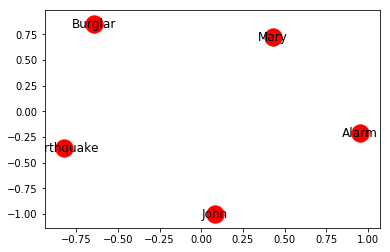

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
rvs = ['Burglar','Earthquake','Alarm','John','Mary']

G.add_nodes_from(rvs)
nx.draw_networkx(G, arrows=True)

plt.show()

Now we want to add edges, which are directed and which represent influence.  For example, we know that both earthquakes and burglars might make the alarm go off.  Thus we add the edges

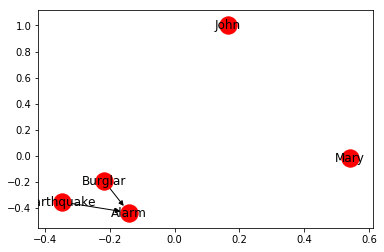

In [22]:
G.add_edges_from([('Burglar', 'Alarm'),('Earthquake','Alarm')], weight=2)
nx.draw_networkx(G, arrows=True)

plt.show()

Of course we also know that the alarm might alert either John or Mary, who would then call.

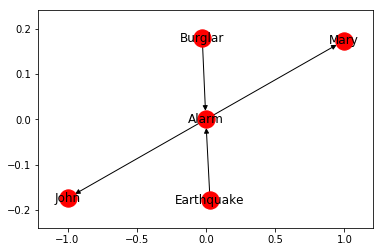

In [26]:
G.add_edges_from([('Alarm', 'John'),('Alarm','Mary')], weight=2)
nx.draw_networkx(G,arrows=True)

plt.show()


Now, we can read off a factorization of the joint probability distribution from the graph.  In particular we have
$$ P(B,E,A,J,M) = P(B)P(E)P(A|B,E)P(J|A)P(M|A). $$  

## Relation to the joint distribution

But is this a valid distribution?  Indeed, we can use the product rule to factorize our unsimplified joint distribution as follows

$$ P(B,E,A,J,M) = P(B)P(E,A,J,M|B) = P(B) P(E|B) P(A,J,M|E,B) = P(B) P(E|B) P(A|B,E) P(J,M|A,B,E) =  P(B) P(E|B) P(A|B,E) P(M|A,B,E) P(J|M,A,B,E) $$
Now, if we state that earthquakes are conditionally independent from earthquakes, that John calling is conditionally independent from Mary calling, and the other statements that we made when generating the graph, we get that
$$P(E|B) = P(E)$$
$$P(M|A,B,E) = P(M|A)$$
$$P(J|M,A,B,E) = P(J|A)$$.
Substitution of these values back into the factorized joint distribution leaves us with the same equation we read off the graph, or that
$$ P(B,E,A,J,M) = P(B)P(E)P(A|B,E)P(J|A)P(M|A). $$
Thus, we know that we have a good and valid probability distribution, just with some edges removed.  In fact, as long as a directed graph does not contain cycles, then it can be obtained through a factorization of the joint distribution.

Note the computational savings.  All our variables are boolean, so for an unconditioned random variable, we only need one parameter to describe it (this is the Bernoulli distribution), for example
$$P(E=1) = \theta_E.$$
and
$$P(E=0) = 1 - \theta_E.$$
For the conditional distributions, we have a table again

| $A$ | $P(J|A)$ | 
| --- | --- | 
| 1 | $\theta_{J,0}$ |
| 0 | $\theta_{J,1}$ |

which has two parameters.  In general, we'll have $2^{Pa}$ parameters, where $Pa$ is the number of conditions, or as they're called in the graph context "parent nodes".  Thus in this problem, we have gone from 31 parameters to 1 + 1 + 4 + 2 + 2 = 10 parameters, a substantial improvement.  